<a href="https://colab.research.google.com/github/sayid-alt/portfolio/blob/main/data-analyst/electricity-consumption/electricity_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**

Listrik merupakan kebutuhan vital dalam kehidupan sehari-hari, baik untuk rumah tangga, industri, maupun layanan publik. Namun, konsumsi listrik sangat dipengaruhi oleh berbagai faktor, terutama kondisi cuaca. Perubahan suhu, durasi sinar matahari, kecepatan angin, dan kelembapan udara dapat memengaruhi kebutuhan energi di suatu wilayah. Oleh karena itu, memahami dan memprediksi pola konsumsi listrik berdasarkan data cuaca menjadi krusial dalam perencanaan distribusi energi yang efisien dan berkelanjutan.

Dalam kompetisi ini, peserta ditantang untuk membangun model prediksi konsumsi listrik harian (dalam satuan GWh) berdasarkan data historis cuaca dan energi dari beberapa cluster wilayah yang berbeda. Dataset yang disediakan mencakup berbagai parameter meteorologis seperti suhu udara, kecepatan angin, durasi sinar matahari, radiasi gelombang pendek, dan evapotranspirasi, serta data waktu (tahun, bulan, hari).

Dengan memanfaatkan data ini, peserta diharapkan dapat membuat prediksi yang akurat untuk mendukung efisiensi energi nasional, pengendalian beban puncak, serta mitigasi risiko pemadaman. Tantangan ini tidak hanya menjadi ajang untuk mengasah kemampuan machine learning Anda, tetapi juga berkontribusi pada solusi nyata dalam pengelolaan energi masa depan Indonesia.


# **Table Descriptions**

| Kolom                 | Tipe   | Deskripsi                                                                 |
| :-------------------- | :----- | :------------------------------------------------------------------------ |
| **ID** | string | Identifikasi unik (format: `<cluster_id>_<YYYY-MM-DD>`)                   |
| **date** | string | Format: `YYYY-MM-DD`                                                      |
| **cluster_id** | string | Identifikasi cluster (misal `cluster_1` hingga `cluster_4`)               |
| **electricity_consumption** | float  | (Hanya di `train.csv`) Konsumsi listrik harian dalam GWh                  |
| **temperature_2m_max** | float  | Suhu maksimum di ketinggian 2 meter (°C)                                  |
| **temperature_2m_min** | float  | Suhu minimum di ketinggian 2 meter (°C)                                   |
| **apparent_temperature_max** | float  | Suhu terasakan maksimum (°C)                                              |
| **apparent_temperature_min** | float  | Suhu terasakan minimum (°C)                                               |
| **sunshine_duration** | float  | Durasi sinar matahari per hari (jam)                                      |
| **daylight_duration** | float  | Durasi siang hari (detik)                                                 |
| **wind_speed_10m_max** | float  | Kecepatan angin maksimum di 10 meter (m/s)                                |
| **wind_gusts_10m_max** | float  | Kecepatan embusan angin maksimum di 10 meter (m/s)                        |
| **wind_direction_10m_dominant** | int    | Arah angin dominan di 10 meter (derajat dari utara)                       |
| **shortwave_radiation_sum** | float  | Total radiasi gelombang pendek (MJ/m²)                                    |
| **et0_fao_evapotranspiration** | float  | Evapotranspirasi referensi FAO (Penman-Monteith) (mm)                     |



# **Research Question**
After predicting electricity consumption data in the Kaggle competition above, there will be a research question section where you will answer questions related to the dataset. For consistency, you may use the Training Dataset for this stage. Answers should be submitted in PDF format or a notebook in .ipynb format. You are free to use visualization tools, hypothesis testing, source citations, or other tools to support your answers.

1. In the context of energy business and public policy, is predicting daily electricity consumption urgent? Explain the urgency from a grid management and capacity planning perspective!

2. Does your electricity consumption prediction model overfit or underfit? If so, demonstrate this through metrics or visualizations, and explain the mitigation steps taken! If not, explain why!

3. Are there any recurring temporal patterns visible in electricity consumption? What country/region does this dataset come from? Explain your reasoning based on the observed seasonal patterns!

4. Is there a correlation in electricity consumption between clusters/regions? What is the average electricity consumption ratio between clusters, and how does this affect your modeling approach?

5. Answer the following statistical question:
  - What is the average electricity consumption of each cluster when the minimum temperature is below the 25th percentile and the sunshine duration is below average? What insights can be gained from this?
  - Are there any specific cluster and time period combinations that have electricity consumption that could be considered outliers? Explain your justification.

6. Are there any pairs of weather variables that are highly correlated? Are there any multicollinearity effects that need to be addressed in the modeling?

7. What new features did you create through the feature engineering process? Explain how these features improve the model's understanding of electricity consumption patterns.

8. Describe the model you used to predict electricity consumption. Why did you choose this model over other alternatives?

9. Do you think the RMSE assessment metric is appropriate for this case? If not, what metric would be more appropriate? Elaborate on your answer!

10. If you were allowed to use external data, what data would you use to improve the accuracy of electricity consumption predictions? Explain the reasons for the selection and how the data can be integrated.

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin

import os

import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Read Data**

In [ ]:
data_path = '/content/drive/MyDrive/compfest-25/data/'
test_csv, submission_csv, train_csv = os.listdir(data_path)

print("""csv files:
  - {}
  - {}
  - {}
  """.format(test_csv, submission_csv, train_csv))

csv files:
  - test.csv
  - submission.csv
  - train.csv
  


In [ ]:
train_df = pd.read_csv(os.path.join(data_path, train_csv))
test_df = pd.read_csv(os.path.join(data_path, test_csv))
submission_df = pd.read_csv(os.path.join(data_path, submission_csv))

In [ ]:
from IPython.display import display
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

display(train_df.head())
display(train_df.info())

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

None

In [ ]:
test_df.head()

,ID,date,cluster_id,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2022-01-01,2022-01-01,cluster_1,15.2,7.9,14.2,5.2,21902.986667,29784.506667,22.2,37.8,172.732245,4.173333,0.780000
1,cluster_2_2022-01-01,2022-01-01,cluster_2,15.9,4.1,15.3,1.3,23550.080000,30647.540000,22.7,38.5,163.972679,5.146667,0.730000
2,cluster_3_2022-01-01,2022-01-01,cluster_3,18.6,4.9,18.8,1.8,24179.643333,31545.103333,15.5,26.3,198.645137,5.713333,0.730000
3,cluster_4_2022-01-01,2022-01-01,cluster_4,13.3,3.9,11.9,1.3,23839.203333,30766.446667,16.1,27.4,183.517316,4.200000,0.486667
4,cluster_1_2022-01-02,2022-01-02,cluster_1,14.1,8.1,11.2,5.3,21018.193333,29847.110000,34.4,59.4,223.335840,4.030000,1.170000


In [ ]:
submission_df.head()

,ID,electricity_consumption
0,cluster_1_2022-01-01,0.0
1,cluster_2_2022-01-01,0.0
2,cluster_3_2022-01-01,0.0
3,cluster_4_2022-01-01,0.0
4,cluster_1_2022-01-02,0.0


# **Cleaning Data**

In [ ]:
train_df.info()
cleaned_df = train_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

In [ ]:
cols = train_df.columns.tolist()
print(cols.index('ID'))
for col in ['ID', 'date']:
  if col in cols:
    print('{} in cols'.format(col))
  else:
    print('{} in not cols'.format(col))

0
ID in cols
date in cols


In [ ]:
# @title **Remove Unnecessary Column**

class DropUnusedCols(TransformerMixin):
  def __init__(self, cols_to_drop):
    self.cols_to_drop=cols_to_drop

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    print('====\nRunning <DropUnusedCols>')
    try:
      columns_list = X.columns.tolist()
      for col in list(self.cols_to_drop):
        if col not in columns_list:
          popped_col = self.cols_to_drop.pop(self.cols_to_drop.index(col))
          print('\33[33m{} not found in axis\33[0m ==> remove from drop list..'.format(popped_col))

      if len(self.cols_to_drop) == 0:
        raise Exception("No Reqeusted Columns to drop...")
      else:
        print('Existing Columns to drop: {}'.format(self.cols_to_drop))
        dropped = X.drop(columns=self.cols_to_drop)
        dropped_df = pd.DataFrame(dropped)
        return dropped_df

    except Exception as e:
      print('\n====\n\33[31mException!: \33[31m{}\33[0m'.format(e))
      print('Return the original values...')
      return pd.DataFrame(X)

dropper = DropUnusedCols(cols_to_drop=['ID'])
cleaned_df = dropper.transform(cleaned_df)
cleaned_df

====
Running <DropUnusedCols>
Existing Columns to drop: ['ID']


,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2021-12-30,cluster_4,994.158,14.9,7.7,15.6,6.2,16136.066667,30666.253333,22.8,42.8,263.384394,3.563333,0.590000
11684,2021-12-31,cluster_1,354.565,14.7,7.7,13.4,5.2,19148.153333,29727.200000,20.7,37.4,201.332279,3.510000,0.513333
11685,2021-12-31,cluster_2,507.510,16.2,7.0,16.3,4.5,20570.920000,30594.280000,23.3,40.7,186.250597,5.006667,0.733333
11686,2021-12-31,cluster_3,705.999,15.9,5.9,15.9,3.2,26860.350000,31496.173333,15.1,27.7,196.223902,5.783333,0.720000


In [ ]:
# @title **Convert date data type**
class ConvertDataTypes(TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    X['date'] = pd.to_datetime(X['date'])
    return X

converter = ConvertDataTypes()
cleaned_df = converter.transform(cleaned_df)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         11688 non-null  datetime64[ns]
 1   cluster_id                   11688 non-null  object        
 2   electricity_consumption      11688 non-null  float64       
 3   temperature_2m_max           11688 non-null  float64       
 4   temperature_2m_min           11688 non-null  float64       
 5   apparent_temperature_max     11688 non-null  float64       
 6   apparent_temperature_min     11688 non-null  float64       
 7   sunshine_duration            11688 non-null  float64       
 8   daylight_duration            11688 non-null  float64       
 9   wind_speed_10m_max           11688 non-null  float64       
 10  wind_gusts_10m_max           11688 non-null  float64       
 11  wind_direction_10m_dominant  11688 non-nu

## **Missing Values**

In [ ]:
missing_values = cleaned_df.isna().sum()
missing_values[missing_values > 0]

,0


## **Duplicated Data**

In [ ]:
cleaned_df.duplicated().sum()

np.int64(0)

## **Outliers**

In [ ]:
numeric_cols = cleaned_df.select_dtypes(include="number").columns

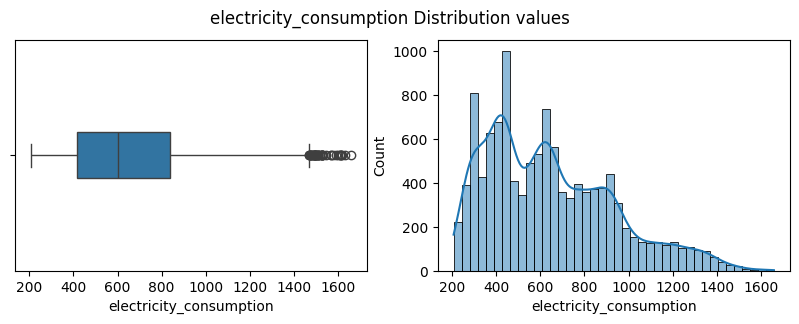

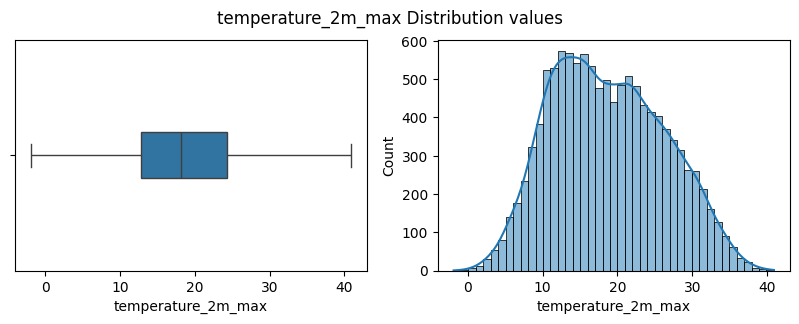

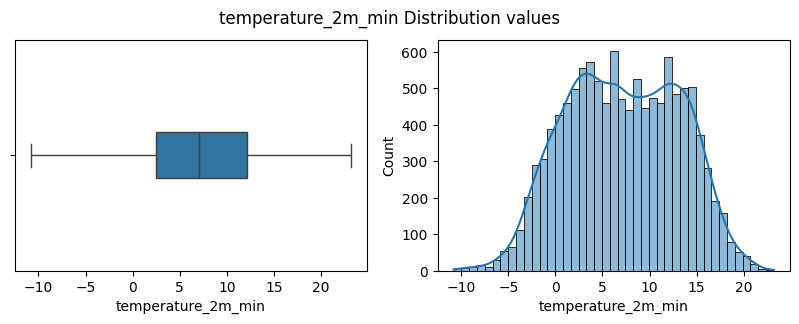

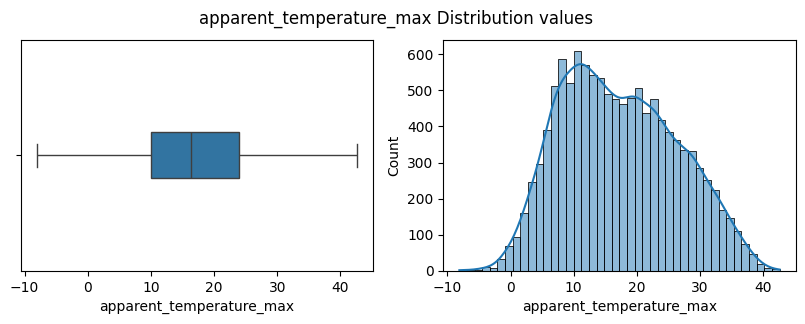

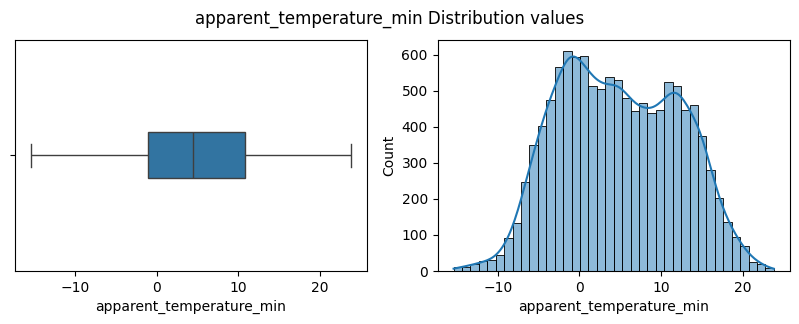

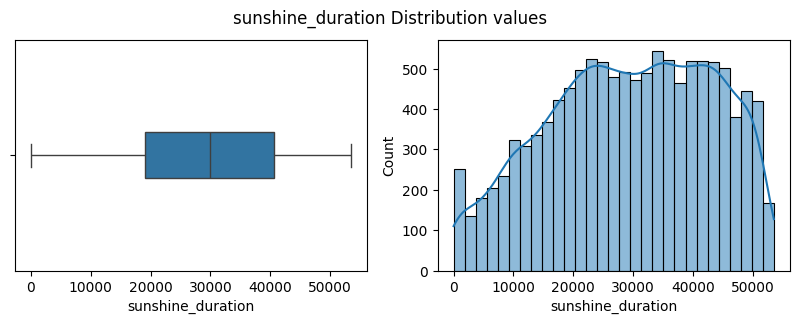

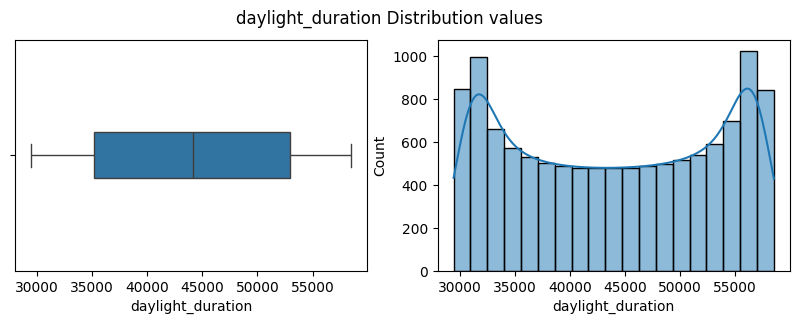

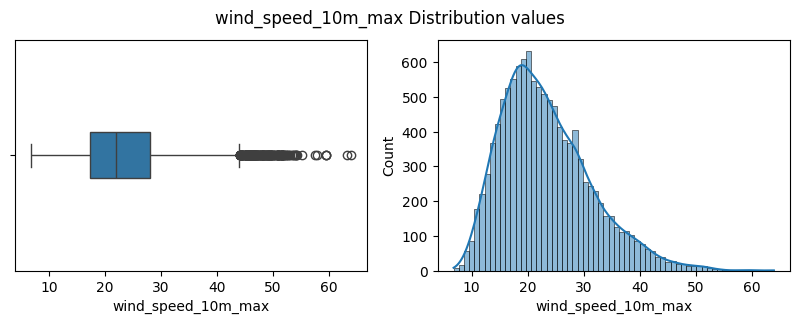

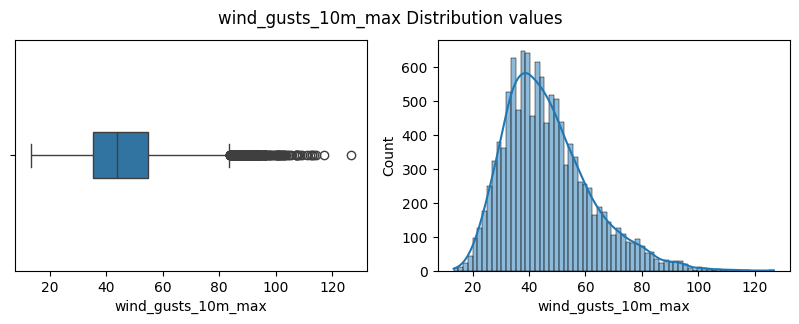

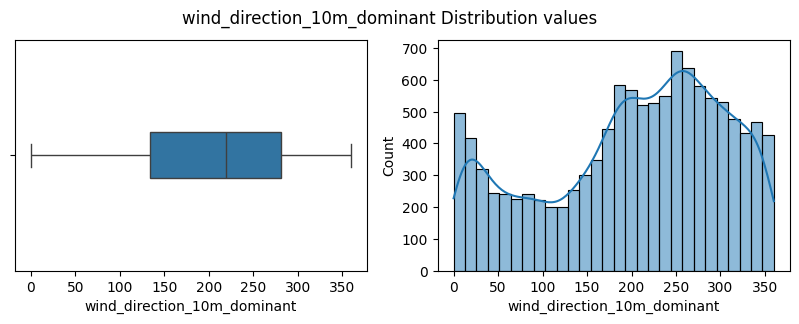

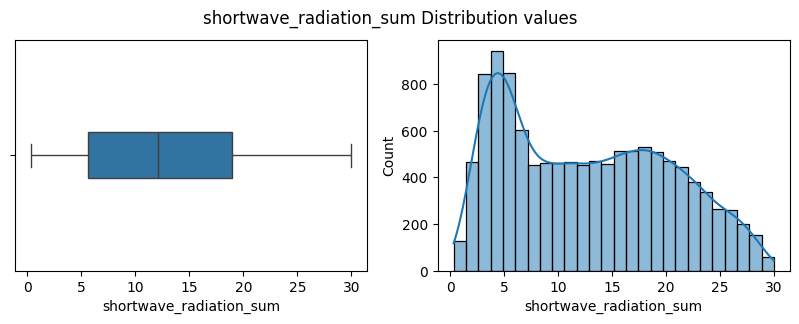

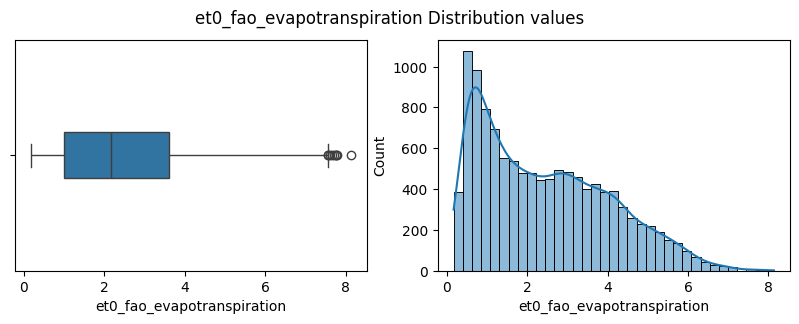

In [ ]:
# @title **Visualize the Outliers**
def visualize_outliers(df, column):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
  fig.suptitle("{} Distribution values".format(column))
  sns.boxplot(data=df, x=column, ax=axes[0], width=0.2)
  sns.histplot(data=df, x=column, ax=axes[1], kde=True)

for col in numeric_cols:
  visualize_outliers(df=cleaned_df, column=col)

electricity_consumption(46)
wind_speed_10m_max(192)
wind_gusts_10m_max(260)
et0_fao_evapotranspiration(9)


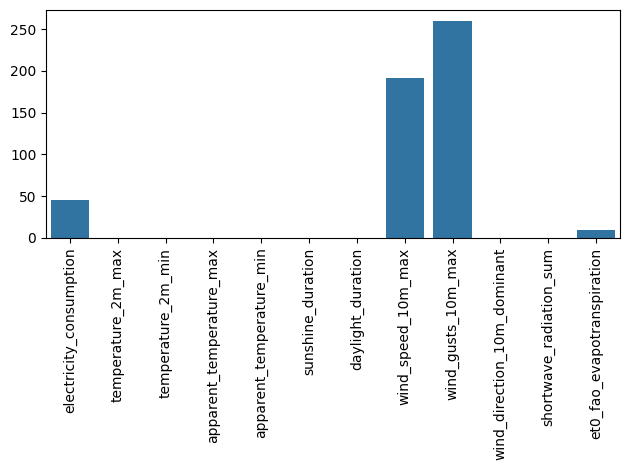

In [ ]:
# @title **Calculate the outliers with IQR**
def calc_outliers_with_iqr(df):
  """Calculate the outliers data from each columns
  args:
    df: Dataframe

  return:
    dict: key-value pairs for outliers data (series) and the number of length (int)
  """
  outliers_dict = {}
  for col in df.select_dtypes('number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outlier_values = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)].to_numpy()
    outliers_dict[col] = {'data': outlier_values, 'length': len(outlier_values)}

  return outliers_dict

outliers_train = calc_outliers_with_iqr(cleaned_df)

for col_name in outliers_train:
  outliers = outliers_train[col_name]['data']
  outliers_len = outliers_train[col_name]['length']
  if outliers_len != 0:
    print(f'{col_name}({outliers_len})')

# visual the length of the outliers for each column
sns.barplot(x=numeric_cols.tolist(), y=[outliers_train[col]['length'] for col in numeric_cols])
plt.xticks(rotation=90)
plt.tight_layout() # Add tight_layout for better spacing
plt.show() # Add plt.show() to display the plot

# **EDA**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

In [ ]:
consumptions_time_series = train_df[['date', 'electricity_consumption']]
consumptions_time_series = consumptions_time_series.set_index('date')
fig = px.line(data_frame=consumptions_time_series, title='electricity_consumption')
fig.show()

## **Cluster Characteristics**

In [ ]:
# get electricity consumption value and cluster id
elec_consumptions = train_df[['electricity_consumption', 'cluster_id']]

# group by cluster id to summarize the mean, min, max, std
elec_consumptions_info = elec_consumptions.groupby('cluster_id').agg({
    'electricity_consumption': ['mean', 'min', 'max', 'std']
})

# show the summaries
display(elec_consumptions_info)

# plot the time series value for each clusters
px.line(elec_consumptions, x=train_df['date'], y='electricity_consumption', title='Cluster time series',
        facet_row='cluster_id', color='cluster_id', facet_row_spacing=0.333333)

electricity_consumption                               
                              mean      min       max         std
cluster_id                                                       
cluster_1               340.734297  207.472   596.324   75.792626
cluster_2               503.367172  322.788   883.860  107.910887
cluster_3               706.762751  475.394  1163.126  128.683461
cluster_4              1018.389092  651.596  1658.348  203.052076

We can see that electricity consumptions for each the cluster are having their own consupmtion number. We interested to figure out about the **ratio of average consumtions** each clusters.

To do this we'll take mean values for each cluster electricity consumptions, and calculate the consumption ratio by the following steps:

1. Take the lowest value of all cluster electricity consumptions average.
2. Divide each the average values by the lowest one.

This two steps will obtian the value of how many times the average of cluster mean is higher than the lowest one.

,cluster_1,cluster_2,cluster_3,cluster_4
cluster_1,1.000000,1.477301,2.074234,2.988807
cluster_2,0.676910,1.000000,1.404070,2.023154
cluster_3,0.482106,0.712215,1.000000,1.440921
cluster_4,0.334582,0.494278,0.694001,1.000000


Text(0.5, 1.0, 'Inter-cluster Ratio')

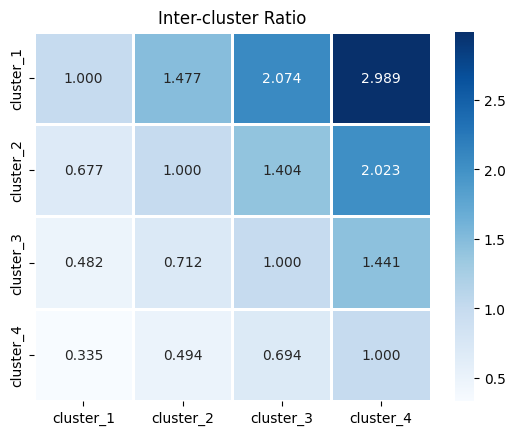

In [ ]:
# @title **Calculate ratio of average**

def calculate_ratio(*numbers):
  ratio_values = np.zeros(shape=(len(numbers), len(numbers)))

  for v1_i in range(len(numbers)):
    for v2_i in range(len(numbers)):
      # Calculate the ratio of two values
      # This division obtains how many times larger the v2 depends to v1
      ratio = numbers[v2_i] / numbers[v1_i]
      ratio_values[v1_i][v2_i] = ratio

  return ratio_values

# Get the mean values of the electrical consumption for each cluster
# Then convert it into the list type. It's necessary because the function passes the *numbers (asterik) numbersument
clusters_mean = elec_consumptions_info.reset_index().loc[:,'electricity_consumption']['mean'].values.tolist()

# Then pass the numbers into the calculate_ratio function,
# and return the array of ratio number respectively to the order of the cluster list
ratio_values = calculate_ratio(*clusters_mean)

# Create a dataframe to clearly display the ratio
clusters_id = train_df['cluster_id'].unique()
ratio_values_df = pd.DataFrame(ratio_values, index=clusters_id, columns=clusters_id)

# display dataframe
display(ratio_values_df)

# visualize the heatmap of the ratio
sns.heatmap(ratio_values_df, annot=True, fmt='.3f', cmap='Blues', linewidths=2)
plt.title('Inter-cluster Ratio')


The visual of heatmap above represents each cluster ratio value of the corresponded another cluster. The yaxis denotes the index of the corresponding clusters, meanwhile the xaxis is a cluster to that the ratio had been calculated.

The values are representing how many times the calculated cluster higher than the corresponding cluster. For the `cluster_2` is `1.477` higher ratio to the `cluster_1`.

The first row indicates the ratio all the cluster to the `cluster_1`. It all seems definitely make sense if we looked up the time series of the consumption values. When `cluster_2` is higher than `cluster_1`, and `cluster_3`, `cluster_4` are even higher.

## **Correlation**

,date,cluster_1,cluster_2,cluster_3,cluster_4
0,2014-01-01,358.032,548.247,758.303,1072.077
4,2014-01-02,386.908,567.775,796.859,1153.619
8,2014-01-03,395.319,577.312,806.132,1176.124
12,2014-01-04,378.062,547.730,771.702,1112.809
16,2014-01-05,372.324,553.213,760.920,1107.926


<Axes: >

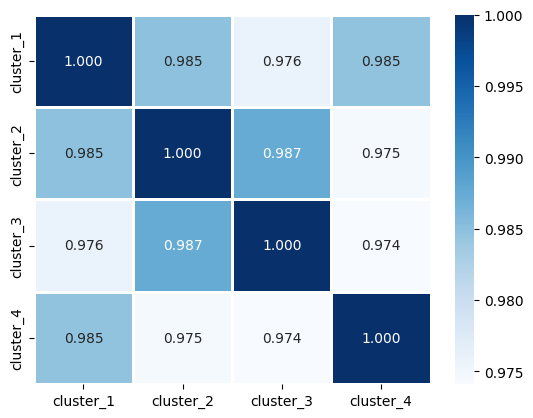

In [ ]:
# @title **Cluster x Consumption Correlation**

# set dict to store the new clusters data
cluster_consume_dict = {}

# add the cluster data into the dict
for cluster in train_df['cluster_id'].unique():
  cluster_consume_dict['date'] = train_df['date'][train_df['cluster_id'] == 'cluster_1']
  cluster_consume_dict[cluster] = train_df[train_df['cluster_id'] == cluster]['electricity_consumption'].values

# create a dataframe
cluster_consume_df = pd.DataFrame(cluster_consume_dict)

# display the first 5 head of the data
display(cluster_consume_df.head())

# visualize the correlation
sns.heatmap(cluster_consume_df.iloc[:, 1:].corr(method='spearman'), cbar=True, annot=True, cmap='Blues', linewidth=2, fmt='.3f')

There is a high correlation in electricity consumption between clusters. while all correlations are high, there is some cluster shows slightly higher than other cluster. From the heatmap indicates that:

|cluster|slightly higher corr to|than to|
|---|---|---|
|cluster_1|clsuter_2, cluster_4|cluster_3|
|cluster_2|cluster_1, cluster_3|cluster_4|
|cluster_3|cluster_2|cluster_1, cluster_3|
|cluster_4|cluster_1|cluster_2, cluster_3|



## **Cluster Distributions**

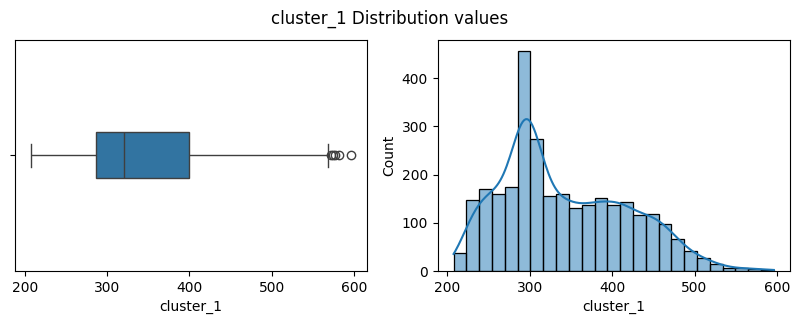

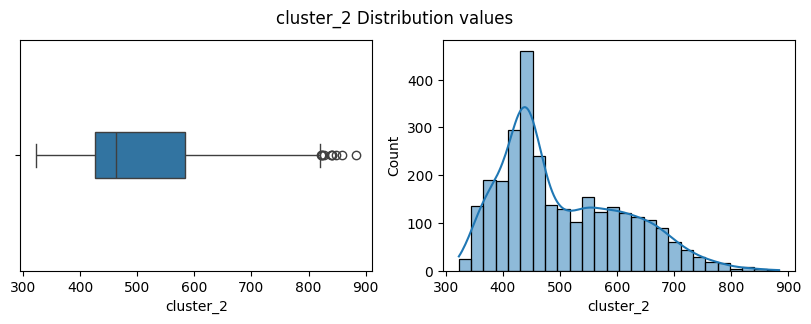

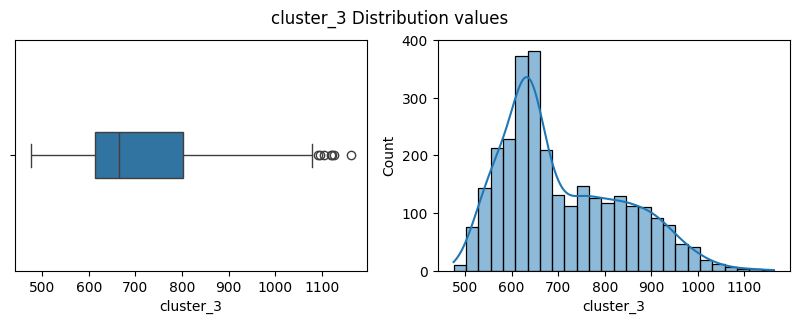

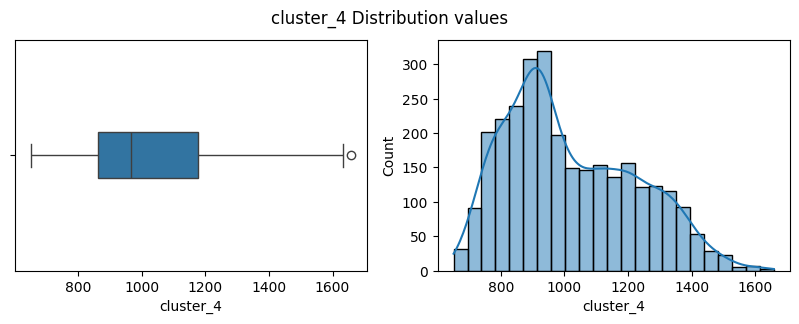

In [ ]:
for col in cluster_consume_df.columns[1:]:
  visualize_outliers(cluster_consume_df, column=col)

In [ ]:
calc_outliers_with_iqr(df=cluster_consume_df)

{'cluster_1': {'data': array([573.957, 596.324, 571.614, 581.674, 576.312]),
  'length': 5},
 'cluster_2': {'data': array([841.606, 839.916, 859.511, 847.579, 821.336, 840.646, 883.86 ,
         827.959, 823.942, 823.251]),
  'length': 10},
 'cluster_3': {'data': array([1104.67 , 1118.955, 1123.117, 1096.631, 1092.644, 1126.363,
         1163.126]),
  'length': 7},
 'cluster_4': {'data': array([1658.348]), 'length': 1}}

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

## **Univariate Analysis**

#### **Temperature Characteristics**

In [ ]:
daily_temp_df = cleaned_df[['date', 'cluster_id', 'apparent_temperature_max', 'apparent_temperature_min']]
daily_temp_df.head()

,date,cluster_id,apparent_temperature_max,apparent_temperature_min
0,2014-01-01,cluster_1,5.5,0.4
1,2014-01-01,cluster_2,8.6,-0.4
2,2014-01-01,cluster_3,10.1,-4.9
3,2014-01-01,cluster_4,6.7,0.6
4,2014-01-02,cluster_1,6.6,3.3


In [ ]:
# @title **Temperature Summary by Cluster**
temp_summary_by_cluster = daily_temp_df.iloc[:, 1:].groupby('cluster_id').agg({'mean', 'min', 'max'})
display(temp_summary_by_cluster)

# Flatten Columns
temp_summary_by_cluster = temp_summary_by_cluster.reset_index()
temp_summary_by_cluster.columns = ['_'.join(col).strip() if col[1] else col[0] for col in temp_summary_by_cluster.columns]

# Melting DataFrame
temp_summary_melted = temp_summary_by_cluster.melt(
    id_vars='cluster_id',
    value_vars=['apparent_temperature_min_mean', 'apparent_temperature_max_mean'],
    var_name='temperature_type',
    value_name='average_temperature'
)

fig = px.bar(data_frame=temp_summary_by_cluster,
             y='cluster_id',
             x=['apparent_temperature_min_mean', 'apparent_temperature_max_mean'],
             text_auto=True,
             )
fig.show()

apparent_temperature_max                 apparent_temperature_min  \
                                max  min       mean                      max   
cluster_id                                                                     
cluster_1                      39.7 -7.8  14.724367                     21.7   
cluster_2                      42.6 -4.4  17.786003                     23.0   
cluster_3                      42.5 -0.9  19.750479                     23.0   
cluster_4                      42.1 -8.1  16.600411                     23.8   

                            
             min      mean  
cluster_id                  
cluster_1  -14.0  4.703388  
cluster_2  -14.5  4.392847  
cluster_3  -15.4  5.219781  
cluster_4  -14.9  4.822416

In [ ]:
fig = px.histogram(
    data_frame=daily_temp_df,
    x='apparent_temperature_max',
    # facet_col='cluster_id',
    title='Max Temperature Distribution for Each Clusters',
    color='cluster_id',
    marginal='box',
    opacity=0.5,
)

fig.show()

In [ ]:
fig = px.line(
    data_frame=daily_temp_df,
    x='date', y='apparent_temperature_max',
    title='Max Temperature Time Series for Each Clusters',
    color='cluster_id',
)

fig.show()

In [ ]:
fig = px.histogram(
    data_frame=daily_temp_df,
    x='apparent_temperature_min',
    # facet_col='cluster_id',
    title='Min Temperature Distribution for Each Clusters',
    color='cluster_id',
    marginal='box',
    opacity=0.5,
)

fig.show()

In [ ]:
fig = px.line(
    data_frame=daily_temp_df,
    x='date', y='apparent_temperature_min',
    title='Min Temperature Time Series for Each Clusters',
    color='cluster_id',
)

fig.show()

The graphs above shows that all the clusters:
1. `apparent_temperature_max`: has a range within roughly `-9 to 40` celcius. Which sometimes it can be a very cold or very warm. Which it might happened in the afternooon or in a daylight times.
2. `apparent_temperature_min`: has a range within roughly `-15 to 24` celcius. which sometiems it can be a very cold weather or a normal weather. That might happened in the evening or late night.
3. From the known range. It can be said that the clusters or regions are located in a countries that have a four different seasons.
  -  `Spring`: Often associated with warmer temperatures, the beginning of new plant growth, and blooming flowers.
  - `Summer`: The warmest season, typically with longer daylight hours.
  - `Autumn` (or Fall): Temperatures begin to cool, and leaves on deciduous trees change color and fall.
  - `Winter`: The coldest season, often with snow or ice in many regions.

#### **Temperature Summary by Year**

In [ ]:
daily_temp_df['year'] = daily_temp_df['date'].dt.year

In [ ]:
temp_summary_by_year = daily_temp_df.drop(columns=['date']) \
  .groupby(['cluster_id','year']).agg(['min', 'max', 'mean'])

display(temp_summary_by_year)

# Simplify the multi-level column names
temp_summary_by_year = temp_summary_by_year.reset_index()
temp_summary_by_year.columns = ['_'.join(col).strip() if col[1] else col[0] for col in temp_summary_by_year.columns.values]

apparent_temperature_max                   \
                                     min   max       mean   
cluster_id year                                             
cluster_1  2014                     -1.4  35.2  14.684110   
           2015                     -4.6  38.0  14.338904   
           2016                     -1.5  36.7  14.063661   
           2017                     -2.4  37.8  14.898904   
           2018                     -7.8  35.8  15.615616   
           2019                     -0.2  39.7  14.847397   
           2020                      1.4  37.7  15.404372   
           2021                     -4.9  33.2  13.941918   
cluster_2  2014                      0.9  35.1  17.774247   
           2015                     -4.4  38.3  17.852329   
           2016                      0.7  37.1  17.602732   
           2017                     -4.0  40.2  17.460822   
           2018                     -3.6  38.6  18.373425   
           2019                     -0.4  42.6  17.903014   
           2020                      0.7  40.1  18.338798   
           2021                     -0.3  39.8  16.981644   
cluster_3  2014                     -0.7  37.7  20.058630   
           2015                     -0.6  40.8  20.078904   
           2016                      3.7  40.9  19.878415   
           2017                      0.0  39.8  19.450959   
           2018                     -0.9  38.4  20.133973   
           2019                      2.8  42.5  19.639452   
           2020                      3.6  40.8  19.873224   
           2021                      2.0  37.2  18.889589   
cluster_4  2014                     -1.9  35.7  16.527945   
           2015                     -2.4  38.2  16.678904   
           2016                     -0.7  37.5  15.817486   
           2017                     -4.1  37.9  16.695616   
           2018                     -8.1  37.0  17.233425   
           2019                     -0.6  42.1  16.724658   
           2020                      0.6  38.5  17.406011   
           2021                     -4.0  38.4  15.719178   

                apparent_temperature_min                  
                                     min   max      mean  
cluster_id year                                           
cluster_1  2014                     -9.7  18.3  5.244658  
           2015                     -9.3  19.9  4.500548  
           2016                     -9.7  19.6  4.478689  
           2017                    -11.1  20.2  4.653425  
           2018                    -14.0  19.4  4.972329  
           2019                     -9.7  21.3  4.592329  
           2020                     -8.1  21.7  5.169672  
           2021                    -12.6  17.7  4.014795  
cluster_2  2014                     -9.4  21.5  5.049315  
           2015                    -10.8  20.7  4.190411  
           2016                     -9.7  19.6  4.345082  
           2017                    -11.3  19.8  4.257808  
           2018                    -14.5  22.2  4.666027  
           2019                    -14.0  21.8  4.252877  
           2020                     -7.1  23.0  4.709563  
           2021                    -13.3  20.1  3.670959  
cluster_3  2014                    -14.7  20.0  6.095616  
           2015                    -11.9  22.4  5.334247  
           2016                    -10.4  22.3  5.198907  
           2017                    -15.1  21.5  4.746027  
           2018                    -15.4  22.9  5.603562  
           2019                     -9.9  23.0  4.986027  
           2020                     -9.2  22.9  5.565847  
           2021                    -14.5  20.0  4.227123  
cluster_4  2014                    -10.6  19.0  5.182740  
           2015                    -11.1  21.3  4.541918  
           2016                     -9.1  20.5  4.360383  
           2017                    -12.6  21.6  4.669589  
           2018                    -14.9  20.9  5.4

In [ ]:
# @title **Average Cluster Temperature by Year**

# Melt the DataFrame to a long format
temp_summary_melted_avg_year = temp_summary_by_year.melt(
    id_vars=['cluster_id', 'year'],
    value_vars=['apparent_temperature_max_mean', 'apparent_temperature_min_mean'],
    var_name='temperature_type',
    value_name='average_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_avg_year,
    x='year',
    y='average_temperature',
    color='temperature_type',
    barmode='group',
    title='Average Apparent Temperature min and max by Year and Cluster',
    facet_col='cluster_id',
    facet_col_wrap=2, # Adjust as needed for desired layout,
    text_auto=True
)

fig.add_hline(y=temp_summary_by_year['apparent_temperature_max_mean'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_year['apparent_temperature_min_mean'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

**FINDINGS**:
1. Average Max Temperature `cluster_3` passes the average of all max cluster temperature at every year. This indicates that `cluster_3` generally has a warmer temperature.
2. `cluster_1` seems has a coldest weather, where the average of max temperature of the cluster in every year has a lowest and farthest values of the general average.
3.  The Average of minimum temperature for every cluster looks have a stable value of temperature. Which some above and below the general average of minimum temperature.

In [ ]:
# @title **Max Cluster Temperature by Year**

# Melt the DataFrame to a long format
temp_summary_melted_year_max = temp_summary_by_year.melt(
    id_vars=['cluster_id', 'year'],
    value_vars=['apparent_temperature_max_max', 'apparent_temperature_min_max'],
    var_name='temperature_type',
    value_name='max_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_year_max,
    x='year',
    y='max_temperature',
    color='temperature_type',
    barmode='group',
    title='Max Apparent Temperature min and max by Year and Cluster',
    facet_col='cluster_id',
    facet_col_wrap=2 # Adjust as needed for desired layout
)

fig.add_hline(y=temp_summary_by_year['apparent_temperature_max_max'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_year['apparent_temperature_min_max'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

In [ ]:
# @title **min Cluster Temperature by Year**
temp_summary_melted_year_min = temp_summary_by_year.melt(
    id_vars=['cluster_id', 'year'],
    value_vars=['apparent_temperature_max_min', 'apparent_temperature_min_min'],
    var_name='temperature_type',
    value_name='min_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_year_min,
    x='year',
    y='min_temperature',
    color='temperature_type',
    barmode='group',
    title='Min Apparent Temperature by Year and Cluster',
    facet_col='cluster_id',
    facet_col_wrap=2 # Adjust as needed for desired layout
)

fig.add_hline(y=temp_summary_by_year['apparent_temperature_max_min'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_year['apparent_temperature_min_min'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

Interesting findings show in the last chart (Min Apparent Temperature by Year and Cluster)

1. While majority of minimum temperature for each `apparent_temperature_max` and `apparent_temperature_min` are below zero, some year has a minimum temperature above the zero, which it means that year is warmer than another year.
2. `Cluster_3` is the only cluster that has an minimum `apparent_temperature_max` of all the year that above all average of minimum `apparent_temperature_max` temperature value. Which it indicates that `cluster_3` has a relatively warmer temperature of all years than another clusters.


#### **Temperature Summary by Months**


In [ ]:
daily_temp_df['month'] = daily_temp_df['date'].dt.month
temp_summary_by_month = daily_temp_df.drop(columns=['date', 'year']) \
  .groupby(['cluster_id','month']).agg(['min', 'max', 'mean'])

display(temp_summary_by_month)

# Simplify the multi-level column names
temp_summary_by_month = temp_summary_by_month.reset_index()
temp_summary_by_month.columns = ['_'.join(col).strip() if col[1] else col[0] for col in temp_summary_by_month.columns.values]

apparent_temperature_max                   \
                                      min   max       mean   
cluster_id month                                             
cluster_1  1                         -2.4  13.8   5.130242   
           2                         -7.8  18.8   6.032301   
           3                         -3.0  23.3   9.027823   
           4                          2.0  28.0  13.902917   
           5                          6.9  33.7  17.477823   
           6                         13.2  38.6  23.285000   
           7                         14.7  39.7  25.074597   
           8                         15.5  37.7  24.277823   
           9                          8.3  32.7  20.541667   
           10                         4.3  24.4  14.934677   
           11                        -0.8  19.8   9.644583   
           12                        -1.4  13.9   6.865323   
cluster_2  1                         -4.0  15.4   6.829839   
           2                         -4.4  21.0   8.875221   
           3                          2.0  23.3  11.683871   
           4                          6.5  27.1  16.722500   
           5                          7.5  34.0  20.384274   
           6                         14.6  42.6  26.529583   
           7                         17.4  40.4  29.168548   
           8                         18.1  40.1  28.767339   
           9                         12.1  33.9  24.585833   
           10                         2.5  28.4  18.514919   
           11                         1.1  24.3  11.955833   
           12                        -1.5  17.0   8.902823   
cluster_3  1                          0.0  17.3   9.170161   
           2                         -0.9  22.4  10.700442   
           3                          5.5  24.7  13.593548   
           4                          8.1  28.0  18.317500   
           5                         10.2  36.0  22.245161   
           6                         18.3  41.0  28.910417   
           7                         18.8  42.5  31.077823   
           8                         20.2  40.8  30.627016   
           9                         12.6  38.7  26.060833   
           10                         8.9  29.1  20.265726   
           11                         3.2  25.3  14.345833   
           12                        -0.7  20.6  11.166935   
cluster_4  1                         -4.1  14.1   5.323387   
           2                         -8.1  17.7   7.159292   
           3                          1.6  22.4  11.012500   
           4                          2.4  28.0  15.837500   
           5                          7.3  33.2  19.523790   
           6                         15.5  42.1  26.185417   
           7                         16.1  41.8  28.966129   
           8                         17.5  38.4  27.977016   
           9                          9.4  32.9  23.131250   
           10                         3.4  25.5  16.468548   
           11                         0.0  20.8  10.267500   
           12                        -1.9  15.6   6.806048   

                 apparent_temperature_min                   
                                      min   max       mean  
cluster_id month                                            
cluster_1  1                        -11.1   7.4  -2.552016  
           2                        -14.0   6.3  -2.430088  
           3                        -11.0   7.6  -0.959677  
           4                         -7.5  10.2   1.707083  
           5                         -3.1  16.6   5.884677  
           6                          4.9  20.2  10.844583  
           7                          6.5  21.3  13.397581  
           8                          5.0  21.7  13.114516  
           9                          1.2  19.5  10.156250  
           10                        -2.7  14.3   6.069758  
           11                        -8.5  13.2   1.565000  


In [ ]:
# @title **Average Cluster Temperature by Month**

# Melt the DataFrame to a long format
temp_summary_melted_avg_month = temp_summary_by_month.melt(
    id_vars=['cluster_id', 'month'],
    value_vars=['apparent_temperature_max_mean', 'apparent_temperature_min_mean'],
    var_name='temperature_type',
    value_name='average_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_avg_month,
    x='month',
    y='average_temperature',
    color='temperature_type',
    barmode='group',
    title='Average Apparent Temperature min and max by Cluster and Month',
    facet_col='cluster_id',
    facet_col_wrap=2, # Adjust as needed for desired layout,
    text_auto=True
)

fig.add_hline(y=temp_summary_by_month['apparent_temperature_max_mean'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_month['apparent_temperature_min_mean'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

**FINDINGS**:
1. Temperature is starting going up above the average temperature when it starts passing the half of the year. Approximately in 4-5th month, then it still up to the peak in 7th, and finally goes down in 9-10th month. This indicates that between 4th month until 10th is the phase of summer days.
2. And of course `cluster_3` is warmer then another cluster. Where average of maximum temperature start above the general average in 4th month. While other clusters still keep below the average in 4th month.
3. This visualize is useful when it used for see an overall condition of weather when someone will do the plans for holiday in appropriate times and days.


In [ ]:
# @title **Max Cluster Temperature by Month**

# Melt the DataFrame to a long format
temp_summary_melted_avg_month = temp_summary_by_month.melt(
    id_vars=['cluster_id', 'month'],
    value_vars=['apparent_temperature_max_max', 'apparent_temperature_min_max'],
    var_name='temperature_type',
    value_name='max_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_avg_month,
    x='month',
    y='max_temperature',
    color='temperature_type',
    barmode='group',
    title='Max Apparent Temperature min and max by Cluster and Month',
    facet_col='cluster_id',
    facet_col_wrap=2, # Adjust as needed for desired layout,
    text_auto=True
)

fig.add_hline(y=temp_summary_by_month['apparent_temperature_max_max'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_month['apparent_temperature_min_max'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

In [ ]:
# @title **Max Cluster Temperature by Month**

# Melt the DataFrame to a long format
temp_summary_melted_avg_month = temp_summary_by_month.melt(
    id_vars=['cluster_id', 'month'],
    value_vars=['apparent_temperature_max_min', 'apparent_temperature_min_min'],
    var_name='temperature_type',
    value_name='min_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_avg_month,
    x='month',
    y='min_temperature',
    color='temperature_type',
    barmode='group',
    title='Max Apparent Temperature min and max by Cluster and Month',
    facet_col='cluster_id',
    facet_col_wrap=2, # Adjust as needed for desired layout,
    text_auto=True
)

fig.add_hline(y=temp_summary_by_month['apparent_temperature_max_min'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_month['apparent_temperature_min_min'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

**FINDINGS**
1. Months of 6th, 7th, 8th are having the minimum temperature above zero celcius. This inidcates the summer weather within those months.
2. Month 9ths, are stays in above zero, but it seems transisition into the next season, where the margin differences between previous months are high.

#### **Temperature Summary by Weeks**

In [ ]:
daily_temp_df['dayofweek'] = daily_temp_df['date'].dt.dayofweek
temp_summary_by_dayofweek = daily_temp_df.drop(columns=['date', 'year', 'month']) \
  .groupby(['cluster_id','dayofweek']).agg(['min', 'max', 'mean'])

display(temp_summary_by_dayofweek)

# Simplify the multi-level column names
temp_summary_by_dayofweek = temp_summary_by_dayofweek.reset_index()
temp_summary_by_dayofweek.columns = ['_'.join(col).strip() if col[1] else col[0] for col in temp_summary_by_dayofweek.columns.values]

apparent_temperature_max                   \
                                          min   max       mean   
cluster_id dayofweek                                             
cluster_1  0                             -6.4  35.1  14.474341   
           1                             -6.1  36.1  14.530456   
           2                             -7.8  39.3  14.816268   
           3                             -4.9  39.7  14.844976   
           4                             -4.6  37.3  14.983493   
           5                             -4.2  38.6  14.692326   
           6                             -1.6  37.7  14.727578   
cluster_2  0                              0.4  39.5  17.469305   
           1                             -3.6  38.4  17.522062   
           2                             -4.0  39.9  17.862919   
           3                             -1.6  40.4  18.120813   
           4                             -4.4  39.5  18.003589   
           5                             -1.5  42.6  17.752278   
           6                             -0.1  40.1  17.769544   
cluster_3  0                             -0.7  39.8  19.634053   
           1                             -0.9  42.5  19.588729   
           2                             -0.2  41.3  19.639234   
           3                             -0.6  41.0  19.973684   
           4                             -0.4  40.8  19.901196   
           5                              2.0  39.3  19.894245   
           6                              1.8  39.4  19.621583   
cluster_4  0                             -7.8  38.3  16.389688   
           1                             -8.1  39.2  16.250120   
           2                             -4.1  40.3  16.549522   
           3                             -2.7  42.1  16.796651   
           4                             -2.2  38.7  16.991866   
           5                             -4.0  38.4  16.681775   
           6                             -2.0  39.7  16.541966   

                     apparent_temperature_min                  
                                          min   max      mean  
cluster_id dayofweek                                           
cluster_1  0                            -11.9  19.4  4.702878  
           1                            -11.6  20.5  4.688969  
           2                            -14.0  21.7  4.665789  
           3                            -11.1  21.0  4.787560  
           4                            -11.3  19.5  4.636842  
           5                            -12.6  20.7  4.806475  
           6                            -11.9  20.4  4.635252  
cluster_2  0                            -11.3  22.3  4.384892  
           1                            -13.2  23.0  4.296882  
           2                            -14.0  22.0  4.344258  
           3                            -14.5  21.8  4.472727  
           4                            -13.0  22.2  4.440909  
           5                            -14.4  21.5  4.487050  
           6                            -10.8  22.5  4.323022  
cluster_3  0                            -14.7  21.4  5.123741  
           1                            -13.5  22.9  5.147722  
           2                            -15.4  21.7  4.984928  
           3                            -14.9  23.0  5.222727  
           4                            -12.8  22.3  5.381340  
           5                            -15.1  22.3  5.372182  
           6                            -14.9  22.9  5.305995  
cluster_4  0                            -13.2  23.0  4.805036  
           1                            -14.3  22.2  4.739568  
           2                            -14.9  22.6  4.679426  
           3                            -14.9  23.8  4.821531  
           4                            -12.5  20.9  4.927512  
           5                            -14.5  21.3  4.945084  
           6                            -12.4  22.0  4

In [ ]:
temp_summary_by_dayofweek.columns

Index(['cluster_id', 'dayofweek', 'apparent_temperature_max_min',
       'apparent_temperature_max_max', 'apparent_temperature_max_mean',
       'apparent_temperature_min_min', 'apparent_temperature_min_max',
       'apparent_temperature_min_mean'],
      dtype='object')

In [ ]:
# @title **Average Cluster Temperature by dayofweek**

# Melt the DataFrame to a long format
temp_summary_melted_avg_dayofweek = temp_summary_by_dayofweek.melt(
    id_vars=['cluster_id', 'dayofweek'],
    value_vars=['apparent_temperature_max_mean', 'apparent_temperature_min_mean'],
    var_name='temperature_type',
    value_name='average_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_avg_dayofweek,
    x='dayofweek',
    y='average_temperature',
    color='temperature_type',
    barmode='group',
    title='Average Apparent Temperature min and max by Cluster and dayofweek',
    facet_col='cluster_id',
    facet_col_wrap=2, # Adjust as needed for desired layout,
    text_auto=True
)

fig.add_hline(y=temp_summary_by_dayofweek['apparent_temperature_max_mean'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_dayofweek['apparent_temperature_min_mean'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

In [ ]:
# @title **Max Cluster Temperature by dayofweek**

# Melt the DataFrame to a long format
temp_summary_melted_avg_dayofweek = temp_summary_by_dayofweek.melt(
    id_vars=['cluster_id', 'dayofweek'],
    value_vars=['apparent_temperature_max_max', 'apparent_temperature_min_max'],
    var_name='temperature_type',
    value_name='max_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_avg_dayofweek,
    x='dayofweek',
    y='max_temperature',
    color='temperature_type',
    barmode='group',
    title='Average Apparent Temperature min and max by Cluster and dayofweek',
    facet_col='cluster_id',
    facet_col_wrap=2, # Adjust as needed for desired layout,
    text_auto=True
)

fig.add_hline(y=temp_summary_by_dayofweek['apparent_temperature_max_max'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_dayofweek['apparent_temperature_min_max'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

In [ ]:
# @title **Min Cluster Temperature by dayofweek**

# Melt the DataFrame to a long format
temp_summary_melted_avg_dayofweek = temp_summary_by_dayofweek.melt(
    id_vars=['cluster_id', 'dayofweek'],
    value_vars=['apparent_temperature_max_min', 'apparent_temperature_min_min'],
    var_name='temperature_type',
    value_name='min_temperature'
)

# Visualize the chart
fig = px.bar(
    data_frame=temp_summary_melted_avg_dayofweek,
    x='dayofweek',
    y='min_temperature',
    color='temperature_type',
    barmode='group',
    title='Average Apparent Temperature min and max by Cluster and dayofweek',
    facet_col='cluster_id',
    facet_col_wrap=2, # Adjust as needed for desired layout,
    text_auto=True
)

fig.add_hline(y=temp_summary_by_dayofweek['apparent_temperature_max_min'].mean(), line_dash='dash', line_width=1, line_color='blue')
fig.add_hline(y=temp_summary_by_dayofweek['apparent_temperature_min_min'].mean(), line_dash='dash', line_width=1, line_color='red')

fig.show()

### **`sunshine_duration` Characteristics**

In [ ]:
# @title **Date Series by Clusters**
# set sunshine_duration data
sun_duration_df = cleaned_df[['date', 'cluster_id', 'sunshine_duration']]

# display sunshine_duration dataframe
display(sun_duration_df.head())

# display visual chart of sunshine_duration of all time
fig = px.line(data_frame=sun_duration_df, x='date', y='sunshine_duration', facet_row='cluster_id', color='cluster_id')
fig.show()

,date,cluster_id,sunshine_duration
0,2014-01-01,cluster_1,53.003333
1,2014-01-01,cluster_2,8195.656667
2,2014-01-01,cluster_3,16305.260000
3,2014-01-01,cluster_4,9224.803333
4,2014-01-02,cluster_1,22372.000000


sunshine_duration                                                 \
                        mean  min            Q1        median            Q3   
cluster_id                                                                    
cluster_1       28043.938406  0.0  16857.333333  28630.588333  40851.268333   
cluster_2       28459.238617  0.0  18190.615833  28849.283333  39124.390000   
cluster_3       31727.011966  0.0  22444.008333  32456.755000  41631.700000   
cluster_4       28980.435973  0.0  18283.405000  29682.030000  41016.450833   

                          
                     max  
cluster_id                
cluster_1   53498.910000  
cluster_2   52296.236667  
cluster_3   51769.176667  
cluster_4   52810.193333

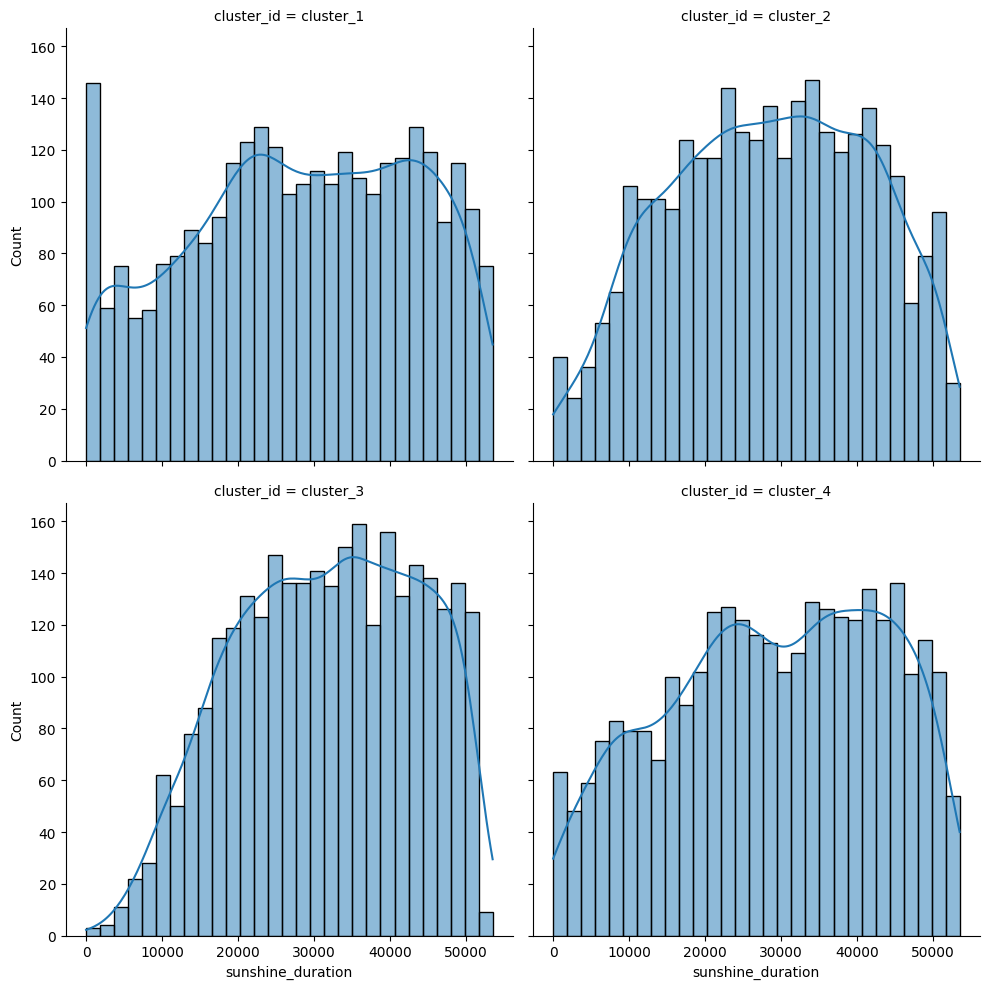

In [ ]:
sun_duration_by_clusters_summary = sun_duration_df.drop(columns=['date']).groupby(['cluster_id']).agg(['mean', 'min',lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75),'max']) \
  .rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})
display(sun_duration_by_clusters_summary)

# fig = px.histogram(
#     data_frame=sun_duration_df,
#     x='sunshine_duration',
#     facet_col='cluster_id',
#     facet_col_wrap=2,
# )
# fig.show()

sns.displot(sun_duration_df, x='sunshine_duration', kde=True, col='cluster_id', col_wrap=2)

In [ ]:
[sun_duration_df[sun_duration_df['cluster_id'] == i] for i in sun_duration_df['cluster_id'].unique()][0]

,date,cluster_id,sunshine_duration
0,2014-01-01,cluster_1,53.003333
4,2014-01-02,cluster_1,22372.000000
8,2014-01-03,cluster_1,21906.060000
12,2014-01-04,cluster_1,5938.093333
16,2014-01-05,cluster_1,13408.483333
...,...,...,...
11668,2021-12-27,cluster_1,11471.446667
11672,2021-12-28,cluster_1,18311.610000
11676,2021-12-29,cluster_1,0.000000
11680,2021-12-30,cluster_1,17750.110000


# **Data Preprocessing**

## **Feature Engineering**

In [ ]:
preprocessed_df = cleaned_df.copy()
preprocessed_df.head()

,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


Feature Engineering:
1. `date` ==> `day`, `month`, `year`, `dayofweek`, `dayofyear`, `quarter`,
2. ``

In [ ]:
class ApplyFeatureEngineering(TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):


SyntaxError: incomplete input (ipython-input-405604756.py, line 4)

There is some outlines are existing in numerical columns. It should put a note, that those values are not mistaken inputed into the data, instead they are the real world values. Hence, dropping it will causes the significant loss of the information.

Since all features that have an outliers are skewed right, it is suitable to use the log transformation method for the way to go treatment for the outlierss. For that, the following steps will be executed:

1. Define the features that has an outliers. Need to make sure that an outliers are skewed-right. So that, the column `electricity_consumption`, `wind_speed_10m_max`, `wind_gusts_10m_max`, `et0_fao_evapotranspiration`.
2. Define log transformation function.
3. Pass the series of feature values to the function.

In [ ]:
outlier_features = ['electricity_consumption', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'et0_fao_evapotranspiration']
outliers_df = cleaned_df[outlier_features]
display(outliers_df)

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func=np.sqrt, validate=True)
outliers_transfored = transformer.transform(outliers_df)
cleaned_df[outlier_features] = outliers_transfored

for ft in outlier_features:
  visualize_outliers(cleaned_df, column=ft)

In [ ]:
scaled_df = train_df.copy()

scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
scaled_array = scaler.fit_transform(train_df[numeric_cols])
scaled_df[numeric_cols] = scaled_array

# re-visualize the distribution after scaling
for col in numeric_cols:
  visualize_outliers(scaled_df, column=col)

## **Handling an outliers**

# **Preprocessing**

# **Research Answers**

## **What is the average electricity consumption of each cluster when the minimum temperature is below the 25th percentile and the sunshine duration is below average?**

In [ ]:
train_df[['date', 'cluster_id','sunshine_duration', 'apparent_temperature_min', 'electricity_consumption']].head(10)

In [ ]:
pd.cut(train_df['sunshine_duration'], bins=5).unique()

In [ ]:
sunshine_duration_avg = train_df['sunshine_duration'].mean()
min_temp_25percentile = train_df['apparent_temperature_min'].quantile(0.25)
condition = train_df.where(
    (train_df['apparent_temperature_min'] < min_temp_25percentile) &
     (train_df['sunshine_duration'] < sunshine_duration_avg)
)

average_consumption_by_cluster = condition.groupby('cluster_id')['electricity_consumption'].mean()

print("Average electricity consumption of each cluster when minimum temperature is below the 25th percentile\nand sunshine duration is below average:\n")
print(average_consumption_by_cluster)

import textwrap
title_text = 'Average electricity consumption of each cluster when minimum temperature is below the 25th percentile and sunshine duration is below average:'
wrapped_title = "<br>".join(textwrap.wrap(title_text, width=60))
fig = px.bar(data_frame=average_consumption_by_cluster, x='electricity_consumption', title=wrapped_title)

fig.show()

**What insights can be gained from this?**<br>



## **Scaling**